In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Testing Hypotheses ##



You know from Data 8 that statistical tests of hypotheses help us use data to make conclusions about the process that generated the data. For example, you might be able to use the ethnic composition of jury panel to see if it was selected at random from the eligible population.

As you know, tests of hypotheses have a few main steps. Here is a brief review.

- State the null hypothesis. In Data 8, this was described as "the hypothesis under which you can simulate data." Here we will describe it as the hypothesis under which you can calculate probabilities.

- State the alternative hypothesis. This might not involve chances. For example, it might say that the jury selection is biased, or that results aren't like tossing a coin.

- Select a test statistic to help you decide which of the two hypotheses is better supported by the data. We recommend that you choose a statistic such that large values of the statistic make you lean towards the alternative. Or you could pick a statistic such that small values make you lean towards the alternative. Just try to avoid the scenario in which large and small values both indicate the alternative; it can sometimes be confusing.

- Figure out the distribution of your test statistic under the null hypothesis. This is your prediction of how the statistic would behave if the null were true.

- Find the observed value of the test statistic and see if it seems consistent with the distribution above. If it does, then the data are consistent with the null hypothesis. If it doesn't, then the data support the alternative hypothesis more than they support the null.

"Consistent" is defined by tail probabilities called *observed significance levels* or *$p$-values*. The $p$-value is the chance, assuming that the null hypothesis is true, of getting a test statistic equal to the one that was observed or even more in the direction of the alternative.

If the $p$-value is small, then the data are unlikely under the null hypothesis and hence are inconsistent with the null.

"Small" is up to you to define. The cutoff you use for "small" is called the *significance level* or simply *level* of the test. Commonly used levels are 5% and 1%. You saw in Data 8 that these are the values that Sir Ronald Fisher found convenient to use back in the 1920's.

If the $p$-value is less than 5%, the result of the test is called *statistically significant*. If the $p$-value is less than 1% the result is called *highly statistically significant*. The use of *significant* does not imply that something important must have happened. It just means that the $p$-value is small.

Let's carry out some tests of hypotheses.

### The Speed of Light ###

The speed of light in vacuum is one of the most important constants in physics. It's the $c$ that appears in Einstein's equation $E = mc^2$, and its numerical value is 299,792.458 km/sec. 

In the early part of the 20th century, the physicist [A.A. Michelson](https://en.wikipedia.org/wiki/Albert_A._Michelson) made fundamentally important contributions to finding the numerical value of the speed of light and became the first American to win a Nobel Prize in science. Berkeley students might be interested to know that Michelson was a graduate of Lowell High School in San Francisco.

Michelson performed numerous experiments to measure the speed of light $c$. In 1926 he reported a value of 299,796 km/sec for $c$. Not bad for measurements made without electronics or lasers!

Suppose 150 such measurements on the speed of light have an average of 299,796 km/sec and an SD of 50 km/sec. Are these data consistent with the model that measurements are i.i.d. with mean equal to the currently accepted value of $c = 299,792.458$? Or are they too big?

To answer this, we can test these two hypotheses.

The *null hypothesis*, denoted $H_0$, says that the model is good. In random variable notation:

- $H_0$: The measurements are observations on random variables $X_1, X_2, \ldots, X_{150}$ that are i.i.d. with mean $299,792.458$.

The *alternative hypothesis*, denoted $H_A$, expresses the opposing position:

- $H_A$: The measurements are too big to be consistent with the model in the null hypothesis.

The alternative says nothing about why or how the measurements are too big. It just says they're too big.

We now have to identify a *test statistic* that will help us choose between $H_0$ and $H_A$. The sample mean $\bar{X} = \frac{1}{n}\sum_{i=1}^{150} X_i$ is a natural candidate. Large values of $\bar{X}$ favor the alternative.

Under the null hypothesis, the distribution of $\bar{X}$ is approximately normal by the Central Limit Theorem. We also know that $E_{H_0}(\bar{X}) = 299792.458$. Notice that we are using the subscript $H_0$ to remind us that the calculations are being done under the null hypothesis.

In order to completely specify the distribution of $\bar{X}$ under the null hypothesis, we need another quantity: the SD of $\bar{X}$. Under $H_0$ we have an i.i.d. sample and so

$$
SD_{H_0}(\bar{X}) ~ = ~ \frac{\sigma}{\sqrt{150}} ~~~~~~~ \text{where } \sigma = SD(X_1)
$$

We don't know $\sigma$. But we do know that the SD of a large i.i.d. sample is most likely a good approximation to the SD of the underlying population. Moreover, the error in the approximation will get divided by $\sqrt{150}$ and end up being negligible. 

The SD of the sample is 50 km/sec, and the sample is likely to be representative of the population. The distribution of $X_1$ is just the underlying distribution of the population, so $SD(X_1) \approx 50$ km/sec. We now have the approximation

$$
SD_{H_0}(\bar{X}) ~ = ~ \frac{\sigma}{\sqrt{150}} ~ \approx ~ \frac{50}{\sqrt{150}} ~ \approx ~ 4.08 \text{ km/sec}
$$

Therefore under $H_0$ the distribution of $\bar{X}$ looks like the figure below. The red dot is at the observed value of $\bar{X}$ which is $299,796$ km/sec.

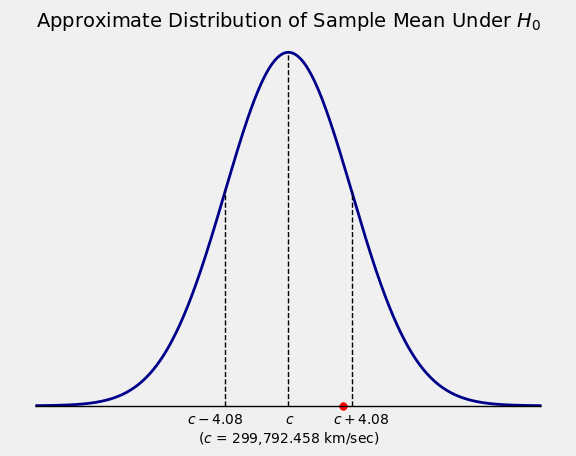

In [2]:
# NO CODE

x = np.arange(-4, 4.01, 0.01)
phi = stats.norm.pdf(x)
plt.plot(x, phi, color='darkblue', lw=2)
plt.xticks([])
plt.yticks([])
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.xlabel('($c$ = 299,792.458 km/sec)', fontsize=10)
plt.text(-0.05, -0.02, '$c$', fontsize=10)
plt.text(0.7, -0.02, '$c+4.08$', fontsize=10)
plt.plot([1, 1], [0, stats.norm.pdf(1)], color='k', lw=1, linestyle='--')
plt.text(-1.6, -0.02, '$c-4.08$', fontsize=10)
z = (299746 - 299742.458)/(50/(150**0.5))
plt.scatter(z, 0, color='red', s=30)
plt.plot([-1, -1], [0, stats.norm.pdf(-1)], color='k', lw=1, linestyle='--')
plt.plot([0, 0], [0, stats.norm.pdf(0)], color='k', lw=1, linestyle='--')
plt.title('Approximate Distribution of Sample Mean Under $H_0$', fontsize=14);

The observed value 299,796 is right in the heart of the distribution of the test statistic under the null hypothesis. In other words, the data are visibly consistent with the null hypothesis.

No further calculation is needed. But if you want, you can compute the $p$-value, see whether it's large or small, and pick one of the hypotheses accordingly.

The *$p$-value* is the chance, assuming that the null hypothesis is true, of getting a test statistic equal to the one that was observed or even more in the direction of the alternative.

The "direction of the alternative" corresponds to large values of the test statistic $\bar{X}$. The $p$-value is therefore

$$
\begin{align*}
P_{H_0}(\bar{X} \ge 299796) ~ &\approx ~ 
1 - \Phi \big{(} \frac{299796 - 299792.458}{4.08} \big{)} \\
&\approx ~ 1 - \Phi(0.87) \\
&\approx ~ 0.1927
\end{align*}
$$

In [3]:
# p-value

z = (299796 - 299792.458)/4.08
1 - stats.norm.cdf(z)

0.19265959918231235

Under the null hypothesis there is almost a 20% chance of getting data like the data that were observed. That's a substantial chance (certainly bigger than 5%, if that's the cutoff you want to use).

The data are consistent with the null hypothesis.

### Emily Rosa's Experiment ###
In 1998, Emily Rosa's article in the Journal of the American Medical Association made news. Not only did the article contain an interesting statistical analysis, [Emily](https://en.wikipedia.org/wiki/Emily_Rosa) was 11 years old. 

As part of her fourth grade science project, the nine-year-old Emily had performed an experiment on practitioners of the *therapeutic touch* (TT). These people claimed that every human body emanates an "energy field" which the practitioners could feel and manipulate by placing their hands near but not on the body.

Emily performed an experiment to test this claim. She reasoned that if practitioners' hands could feel an "energy field" emanating from a body, then the hands should be able to feel the presence of a body even if the body wasn't visible. The picture below is taken from her [paper](https://jamanetwork.com/journals/jama/fullarticle/187390) (co-authored by her parents, among others) and shows how each trial of the experiment worked.

![Emily Rosa's experiment](../images/emily_rosa.png)

That's Emily on the right and a TT practitioner on the left, separated by a tall screen. The screen has two holes cut out at the bottom, through which the practitioner puts her hands out, palms upwards. On the other side, Emily places her right hand above one of the two upturned hands picked at random. The practitioner has to say whether Emily's hand is hovering over their left hand or their right.

The experiment was done in several stages, the first of which involved 150 trials. The TT practitioners picked the correct hand on 70 of those trials. Emily's analysis compared these results to random guessing. 

Are the results like those you would get by tossing a coin, or do they seem different? We can answer this question by carrying out a test of hypotheses. 

$H_0$: The trials can be modeled by i.i.d. Bernoulli $(0.5)$ random variables $X_1, X_2, \ldots, X_{150}$.

$H_A$: The model in the null hypothesis isn't good.

Let $\bar{X} = \frac{1}{150} \sum_{i=1}^{150} X_i$ be the proportion of successes. We are trying to decide whether the results are or are not like tossing a coin, so a natural statistic is $\vert \bar{X} - 0.5 \vert$. Large values of this statistic will favor the alternative.

Equivalently, we can convert to counts and use the statistic $T = \vert X - 75 \vert$ where $X$ is the number of successes.

The observed value of $T$ is $5$. 

Under $H_0$, the distribution of $X$ is binomial $(150, 0.5)$. The $p$-value is given by

$$
\begin{align*}
P_{H_0}(T \ge 5) ~ &= ~ P_{H_0}(\vert X - 75 \vert \ge 5) \\
&= ~ P_{H_0}(X \le 70) + P_{H_0}(X \ge 80) \\
&= ~ \sum_{k=0}^{70} \binom{150}{k}0.5^k0.5^{150-k} ~ + ~ \sum_{k=80}^{150} \binom{150}{k}0.5^k0.5^{150-k}
\end{align*}
$$

The numerical value of this probability can be computed using the cdf of the binomial $(150, 0.5)$ distribution:

In [4]:
# p-value

stats.binom.cdf(70, 150, 0.5) + ( 1 - stats.binom.cdf(79, 150, 0.5) )

0.46254951786683085

The $p$-value is approximately 46%, which is very large. The data are consistent with tossing a coin.

Not only did Therapeutic Touch do no better than tossing a coin, the number of successes was *less* than expected by random guessing. This happened again in a second series of trials: the practitioners guessed correctly on only 53 out of 130 trials. The expected number of heads in 130 tosses of a coin is 65.

Let's use the second set of trials to test whether Therapeutic Touch is actually worse than tossing a coin.

$H_0$: The new trials can be modeled by i.i.d. Bernoulli $(0.5)$ random variables $Y_1, Y_2, \ldots, Y_{130}$.

$H_A$: Therapeutic Touch is worse than tossing a coin, in that it gets fewer than 50% correct results.

Now the number of successes $Y = \sum_{i=1}^{130} Y_i$ can be used as the test statistic. Small values of $Y$ favor the alternative.

The observed value of $Y$ is $53$. 

Under $H_0$, the distribution of $Y$ is binomial $(130, 0.5)$. So the $p$-value is

$$
P_{H_0}(Y \le 53) ~ = ~ \sum_{k=0}^{53} \binom{130}{k} 0.5^k0.5^{130-k}
$$

That's the binomial $(130, 0.5)$ cdf evaluated at 53:

In [5]:
# p-value

stats.binom.cdf(53, 130, 0.5)

0.021627565392914407

The $p$-value is about 2.2%, which is pretty small. In particular, it's less than 5% so the result is statistically significant.

The data support the alternative more than they support the null. The indications are that Therapeutic Touch did worse than random guessing.

#### Note ####
Emily's experiment was clean and the results were compelling. The Therapeutic Touch practitioners protested, claiming bias of various kinds. The paper rebuts these claims but it does contain indications of the authors' perspective – even the sketch reproduced above is drawn by a member of the Skeptics Society.